In [2]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_excel('rp1.xlsx')
df

,year,crl,marks,Grade,Total Marks,Percentage,DF_P,DF_C,DF_ M
0,2018,1,337,2.5,360,93.611111,1.9210,2.3610,1.9710
1,2018,101,272,2.5,360,75.555556,1.9251,2.3651,1.9751
2,2018,201,258,2.5,360,71.666667,1.9251,2.3651,1.9751
3,2018,301,247,2.5,360,68.611111,1.9251,2.3651,1.9751
4,2018,401,240,2.5,360,66.666667,1.9251,2.3651,1.9751
...,...,...,...,...,...,...,...,...,...
1162,2013,15401,127,3.0,360,35.277778,1.7385,2.2385,2.1885
1163,2013,15501,127,3.0,360,35.277778,1.7385,2.2385,2.1885
1164,2013,15601,126,3.0,360,35.000000,1.7385,2.2385,2.1885
1165,2013,15801,126,3.0,360,35.000000,1.7385,2.2385,2.1885


In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167 entries, 0 to 1166
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         1167 non-null   int64  
 1   crl          1167 non-null   int64  
 2   marks        1167 non-null   int64  
 3   Grade        1167 non-null   float64
 4   Total Marks  1167 non-null   int64  
 5   Percentage   1167 non-null   float64
 6   DF_P         1167 non-null   float64
 7   DF_C         1167 non-null   float64
 8   DF_ M        1167 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 91.2 KB


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


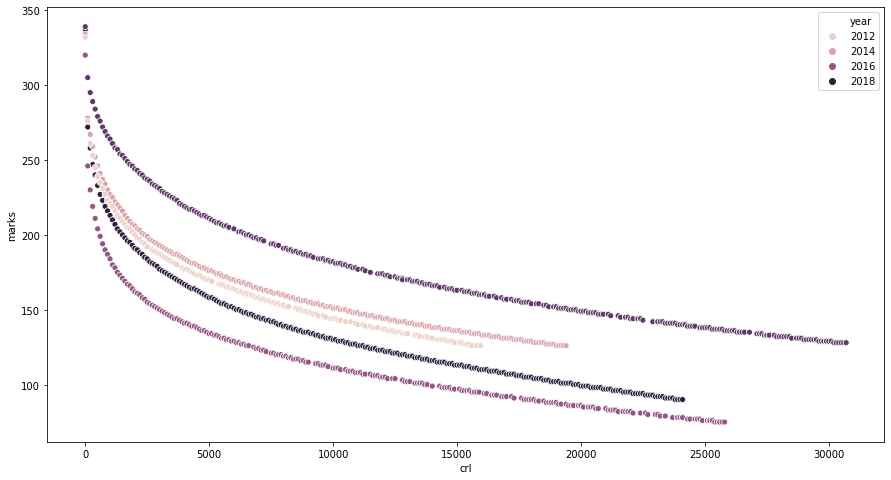

In [8]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='crl',y='marks',data=df,hue='year',legend='brief')

In [9]:
df.describe()

,year,crl,marks,Grade,Total Marks,Percentage,DF_P,DF_C,DF_ M
count,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000
mean,2015.962296,12440.878320,146.436161,2.879606,364.411311,40.238018,2.083256,2.330248,2.084343
std,1.703679,7846.502847,43.907112,1.606733,4.904803,12.181519,0.419966,0.177043,0.198973
min,2013.000000,1.000000,75.000000,0.500000,360.000000,20.161290,1.711000,2.161000,1.841000
25%,2014.000000,5801.000000,118.000000,2.500000,360.000000,32.105735,1.719920,2.235500,1.849920
50%,2016.000000,12001.000000,140.000000,3.000000,360.000000,38.611111,1.929500,2.259100,2.130000
75%,2017.000000,18301.000000,169.000000,5.000000,366.000000,46.448087,2.219100,2.369500,2.186500
max,2018.000000,30701.000000,339.000000,5.000000,372.000000,93.611111,2.919910,2.695910,2.439100


In [10]:
#df.drop(labels=['Grade','Total Marks','DF_P','DF_C','DF_ M'],axis=1,inplace=True)
#df.head()

In [11]:
from sklearn import preprocessing

df1_train=df[['Percentage','marks','DF_P','DF_C','DF_ M','crl']][df['year']!=2013] ## Training Data which excludes 2013 year data
df1_test=df[['Percentage','marks','DF_P','DF_C','DF_ M','crl']][df['year']==2013]  ## Testing data which incldes data of 2013

In [12]:
X_train=df1_train[['Percentage','marks','DF_P','DF_C','DF_ M']]
y_train=df1_train[['crl']]
X_test=df1_test[['Percentage','marks','DF_P','DF_C','DF_ M']]
y_test=df1_test[['crl']]

In [13]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=42,n_estimators=300)

model=rf.fit(X_train,y_train.values.ravel())

y_pred=model.predict(X_test).astype('int')
y_pred

array([  119,   389,   721,   908,  1095,  1312,  1511,  1697,  1929,
        2129,  2238,  2292,  2438,  2560,  2715,  2944,  3093,  3274,
        3373,  3523,  3730,  3936,  4049,  4233,  4286,  4518,  4789,
        4836,  4946,  5095,  5262,  5416,  5587,  5646,  5752,  5849,
        5621,  5676,  5824,  5824,  5905,  5997,  6138,  6264,  6264,
        6412,  6542,  6623,  6623,  6746,  7076,  7076,  7257,  7413,
        7413,  7573,  7573,  7707,  7912,  7912,  8053,  8053,  8050,
        8050,  8207,  8374,  8374,  8561,  8561,  8709,  8709,  8960,
        8960,  9271,  9271,  9288,  9288,  9357,  9357,  9785, 10133,
       10133, 10655, 10655, 11002, 11002, 11906, 11906, 12437, 12437,
       12573, 12758, 12758, 12758, 12758, 12819, 12819, 12922, 12922,
       13026, 13200, 13200, 13354, 13354, 13544, 13544, 13544, 13679,
       13679, 13679, 13679, 13679, 13812, 13812, 13812, 13967, 13967,
       13967, 13967, 14149, 14149, 14149, 14149, 14289, 14289, 14626,
       14626, 14626,

In [14]:
model.score(X_test,y_test)

0.8798448492061566

In [15]:
y_test

,crl
1019,1
1020,101
1021,201
1022,301
1023,401
...,...
1162,15401
1163,15501
1164,15601
1165,15801


In [16]:
from sklearn.metrics import r2_score     ## R2 value
r2_score(y_test, y_pred)

0.8799150914674264

In [17]:
from sklearn.metrics import mean_squared_error
z=mean_squared_error(y_test,y_pred)    ## mean sqaured error
z

2637930.5878378376

In [18]:
import  math                         ## root Mean Squared error
r1=math.sqrt(z)
print(r1)

1624.1707385117606


In [19]:
from sklearn.model_selection import RandomizedSearchCV
parameters = [{'n_estimators': [150,200,250,270,280,300],
               'max_depth':[4.8,4.9,5,5.1,5.2]}]
model_grid_search = RandomizedSearchCV(estimator = model,
                           param_distributions = parameters,
                           n_iter=10,
                           cv = 10,
                           n_jobs = -1)
model_grid_search = model_grid_search.fit(X_train, y_train)
model_best_parameters =model_grid_search.best_params_
print("Best Parameters:", model_best_parameters)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Parameters: {'n_estimators': 280, 'max_depth': 5}


In [20]:
model.feature_importances_

array([0.4620678 , 0.15831857, 0.07157311, 0.15068767, 0.15735285])

In [21]:
X_train

,Percentage,marks,DF_P,DF_C,DF_ M
0,93.611111,337,1.92100,2.36100,1.9710
1,75.555556,272,1.92510,2.36510,1.9751
2,71.666667,258,1.92510,2.36510,1.9751
3,68.611111,247,1.92510,2.36510,1.9751
4,66.666667,240,1.92510,2.36510,1.9751
...,...,...,...,...,...
1014,35.000000,126,2.91991,2.69591,2.4391
1015,35.000000,126,2.91991,2.69591,2.4391
1016,35.000000,126,2.91991,2.69591,2.4391
1017,35.000000,126,2.91991,2.69591,2.4391


In [22]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10,100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [23]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf2 = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf2, param_distributions = random_grid, n_iter =50, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [24]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 400}

In [25]:
y_pred_tuned=rf_random.predict(X_test).astype(int)
y_pred_tuned

array([ 1032,  1108,  1279,  1369,  1501,  1687,  1800,  1890,  2020,
        2135,  2233,  2267,  2442,  2605,  2721,  2831,  2973,  3080,
        3158,  3270,  3382,  3584,  3706,  3865,  3929,  4061,  4228,
        4312,  4412,  4476,  4950,  5009,  5059,  5259,  5282,  5403,
        5487,  5586,  5696,  5696,  5779,  5839,  6014,  6102,  6102,
        6229,  6435,  6636,  6636,  6765,  7003,  7003,  7180,  7345,
        7345,  7499,  7499,  7637,  7823,  7823,  7992,  7992,  8217,
        8217,  8423,  8559,  8559,  8830,  8830,  8944,  8944,  9079,
        9079, 10561, 10561, 10676, 10676, 11276, 11276, 12387, 12553,
       12553, 12765, 12765, 12854, 12854, 13057, 13057, 13165, 13165,
       13380, 13514, 13514, 13514, 13514, 13616, 13616, 13789, 13789,
       13920, 14374, 14374, 14486, 14486, 14821, 14821, 14821, 14905,
       14905, 14905, 14905, 14905, 15241, 15241, 15241, 15399, 15399,
       15399, 15399, 15664, 15664, 15664, 15664, 15863, 15863, 16180,
       16180, 16180,

In [26]:
z_tuned=mean_squared_error(y_test,y_pred_tuned)    ## mean sqaured error
z_tuned

5430266.1486486485

In [27]:
r_tuned=math.sqrt(z_tuned)
print(r_tuned)

2330.293146505102


In [28]:
y_test

,crl
1019,1
1020,101
1021,201
1022,301
1023,401
...,...
1162,15401
1163,15501
1164,15601
1165,15801


In [29]:
r2_score(y_test, y_pred_tuned)

0.7528012993311977

In [30]:
from sklearn import preprocessing

df2_train=df[['Percentage','marks','DF_P','DF_C','DF_ M','crl']][df['year']!=2016] ## Training Data which excludes 2016 year data
df2_test=df[['Percentage','marks','DF_P','DF_C','DF_ M','crl']][df['year']==2016]  ## Testing data which incldes data of 2016

In [31]:
X2_train=df2_train[['Percentage','marks','DF_P','DF_C','DF_ M']]
y2_train=df2_train[['crl']]
X2_test=df2_test[['Percentage','marks','DF_P','DF_C','DF_ M']]
y2_test=df2_test[['crl']]

In [32]:
rf=RandomForestRegressor(random_state=42,n_estimators=300)

model2=rf.fit(X2_train,y2_train.values.ravel())

y2_pred=model2.predict(X2_test).astype('int')
y2_pred

array([   30,   496,   856,  1213,  1517,  1946,  2265,  2630,  3072,
        3424,  3452,  3659,  3764,  4217,  4531,  4779,  5041,  5401,
        5410,  5669,  6101,  6078,  6078,  6189,  6816,  7017,  7513,
        8096,  8416,  8416,  8771,  9091,  9258,  9428,  9445,  9606,
        9814,  9972, 10175, 10175, 10242, 10458, 10847, 10847, 11182,
       11286, 11286, 11661, 12081, 12474, 12474, 12768, 12960, 12960,
       13227, 13227, 13492, 13231, 13231, 13231, 13377, 13377, 13480,
       13480, 13480, 13463, 13463, 12960, 12960, 12960, 13055, 13055,
       13055, 13175, 13334, 13334, 13466, 13466, 13607, 13739, 13739,
       13971, 13971, 13971, 14123, 14123, 14123, 14123, 14296, 14296,
       14296, 14517, 14517, 14517, 14743, 14743, 15069, 15069, 15343,
       15343, 15826, 15826, 15826, 16199, 16414, 16414, 16414, 16704,
       16704, 17095, 17095, 17095, 17343, 17343, 17343, 17343, 17647,
       17647, 17647, 18040, 18040, 18040, 18340, 18340, 18340, 18340,
       18758, 18758,

In [33]:
r2_score(y2_test, y2_pred)

0.5396893730839307

In [34]:
z2=mean_squared_error(y2_test,y2_pred)    ## mean sqaured error
z2

27662680.13768116

In [35]:
r2=math.sqrt(z2)
print(r2)

5259.532311687149


In [36]:
from sklearn import preprocessing

df3_train=df[['Percentage','marks','DF_P','DF_C','DF_ M','crl']][df['year']!=2018] ## Training Data which excludes 2018 year data
df3_test=df[['Percentage','marks','DF_P','DF_C','DF_ M','crl']][df['year']==2018]  ## Testing data which incldes data of 2018

In [37]:
X3_train=df3_train[['Percentage','marks','DF_P','DF_C','DF_ M']]
y3_train=df3_train[['crl']]
X3_test=df3_test[['Percentage','marks','DF_P','DF_C','DF_ M']]
y3_test=df3_test[['crl']]

In [38]:
rf=RandomForestRegressor(random_state=42,n_estimators=300)

model3=rf.fit(X3_train,y3_train.values.ravel())

y3_pred=model3.predict(X3_test).astype('int')
y3_pred

array([  929,  1137,  1318,  1528,  1783,  2134,  2494,  2717,  2802,
        3002,  3153,  3300,  3536,  3810,  3960,  4165,  4410,  4644,
        4838,  5118,  5386,  5484,  5734,  5857,  6251,  6438,  6775,
        6954,  7157,  7227,  7388,  7533,  7686,  7728,  7905,  8044,
        8078,  8257,  8553,  8764,  8923,  9121,  9356,  9667,  9667,
       10093, 10265, 10519, 11914, 12797, 13725, 13725, 14191, 14535,
       15348, 18953, 18953, 20130, 21610, 21610, 22676, 22996, 22996,
       23511, 24182, 24182, 25098, 25098, 25409, 25504, 25504, 25504,
       25504, 25504, 25504, 25504, 25504, 25505, 25509, 25509, 25509,
       25509, 25511, 25511, 25515, 25515, 25771, 25771, 26065, 26065,
       26065, 26755, 26755, 26971, 26971, 27969, 27969, 28355, 28355,
       28355, 28987, 28987, 29529, 29529, 29529, 29986, 29986, 30191,
       30191, 30191, 30460, 30460, 30460, 30460, 30460, 30460, 30460,
       30460, 30460, 30460, 30460, 30460, 30460, 30460, 30460, 30460,
       30460, 30460,

In [39]:
r2_score(y3_test, y3_pred)

-2.5996777516091845

In [40]:
z3=mean_squared_error(y3_test,y3_pred)    ## mean sqaured error
z3

175674209.19421488

In [41]:
r3=math.sqrt(z3)
print(r3)

13254.214770940407


In [47]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [49]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               768       
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 165,633
Trainable params: 165,633
Non-trainable params: 0
_________________________________________________________________


In [51]:
NN_model.fit(X_train,y_train, epochs=400, batch_size=32, validation_split = 0.2)

Epoch 1/400
26/26 [==============================] - 0s 5ms/step - loss: 2466.4927 - mean_absolute_error: 2466.4927 - val_loss: 7064.0762 - val_mean_absolute_error: 7064.0762
Epoch 2/400
26/26 [==============================] - 0s 3ms/step - loss: 2207.2053 - mean_absolute_error: 2207.2053 - val_loss: 7607.4033 - val_mean_absolute_error: 7607.4033
Epoch 3/400
26/26 [==============================] - 0s 3ms/step - loss: 2553.5225 - mean_absolute_error: 2553.5225 - val_loss: 7055.2710 - val_mean_absolute_error: 7055.2710
Epoch 4/400
26/26 [==============================] - 0s 3ms/step - loss: 2139.6162 - mean_absolute_error: 2139.6162 - val_loss: 7050.4165 - val_mean_absolute_error: 7050.4165
Epoch 5/400
26/26 [==============================] - 0s 3ms/step - loss: 2312.6379 - mean_absolute_error: 2312.6379 - val_loss: 6279.9082 - val_mean_absolute_error: 6279.9082
Epoch 6/400
26/26 [==============================] - 0s 3ms/step - loss: 2395.4980 - mean_absolute_error: 2395.4980 - val_los

In [53]:
predictions = NN_model.predict(X_test).astype(int)
predictions

array([[   -1],
       [  248],
       [  480],
       [  748],
       [ 1030],
       [ 1182],
       [ 1257],
       [ 1333],
       [ 1410],
       [ 1491],
       [ 1535],
       [ 1560],
       [ 1571],
       [ 1578],
       [ 1585],
       [ 1592],
       [ 1599],
       [ 1629],
       [ 1645],
       [ 1676],
       [ 1731],
       [ 1829],
       [ 1878],
       [ 1979],
       [ 2031],
       [ 2157],
       [ 2303],
       [ 2384],
       [ 2467],
       [ 2562],
       [ 2657],
       [ 2758],
       [ 2863],
       [ 2986],
       [ 3113],
       [ 3167],
       [ 3184],
       [ 3245],
       [ 3323],
       [ 3323],
       [ 3404],
       [ 3486],
       [ 3568],
       [ 3655],
       [ 3655],
       [ 3755],
       [ 3856],
       [ 3960],
       [ 3960],
       [ 4043],
       [ 4204],
       [ 4204],
       [ 4285],
       [ 4366],
       [ 4366],
       [ 4451],
       [ 4451],
       [ 4591],
       [ 4756],
       [ 4756],
       [ 4976],
       [ 4976],
       [

In [54]:
r2_score(y_test, predictions)

0.8265171492639336

In [55]:
zd3=mean_squared_error(y_test, predictions)    ## mean sqaured error
zd3

3810934.4797297297

In [56]:
rd3=math.sqrt(zd3)
print(rd3)

1952.1614891524034


In [63]:
NN_model.fit(X2_train,y2_train, epochs=400, batch_size=32, validation_split = 0.2)

Epoch 1/400
23/23 [==============================] - 0s 5ms/step - loss: 313.5087 - mean_absolute_error: 313.5087 - val_loss: 895.6207 - val_mean_absolute_error: 895.6207
Epoch 2/400
23/23 [==============================] - 0s 3ms/step - loss: 606.4286 - mean_absolute_error: 606.4286 - val_loss: 1636.5414 - val_mean_absolute_error: 1636.5414
Epoch 3/400
23/23 [==============================] - 0s 3ms/step - loss: 379.7993 - mean_absolute_error: 379.7993 - val_loss: 1602.9861 - val_mean_absolute_error: 1602.9861
Epoch 4/400
23/23 [==============================] - 0s 3ms/step - loss: 469.5503 - mean_absolute_error: 469.5503 - val_loss: 589.5590 - val_mean_absolute_error: 589.5590
Epoch 5/400
23/23 [==============================] - 0s 3ms/step - loss: 530.9532 - mean_absolute_error: 530.9532 - val_loss: 1025.8468 - val_mean_absolute_error: 1025.8468
Epoch 6/400
23/23 [==============================] - 0s 3ms/step - loss: 393.0840 - mean_absolute_error: 393.0840 - val_loss: 1814.3163 - v

In [64]:
d2_predictions = NN_model.predict(X2_test).astype(int)
d2_predictions

array([[    1],
       [  334],
       [  624],
       [  966],
       [ 1252],
       [ 1539],
       [ 1760],
       [ 2015],
       [ 2248],
       [ 2423],
       [ 2597],
       [ 2835],
       [ 2970],
       [ 3209],
       [ 3397],
       [ 3586],
       [ 3779],
       [ 3974],
       [ 4070],
       [ 4288],
       [ 4507],
       [ 4616],
       [ 4616],
       [ 4725],
       [ 4951],
       [ 5065],
       [ 5286],
       [ 5397],
       [ 5511],
       [ 5511],
       [ 5634],
       [ 5763],
       [ 5923],
       [ 6084],
       [ 6259],
       [ 6426],
       [ 6590],
       [ 6753],
       [ 6916],
       [ 6916],
       [ 7080],
       [ 7238],
       [ 7401],
       [ 7401],
       [ 7564],
       [ 7771],
       [ 7771],
       [ 7997],
       [ 8236],
       [ 8474],
       [ 8474],
       [ 8712],
       [ 8950],
       [ 8950],
       [ 9203],
       [ 9203],
       [ 9441],
       [ 9680],
       [ 9680],
       [ 9680],
       [ 9919],
       [ 9919],
       [

In [65]:
r2_score(y2_test, d2_predictions)

0.391049583842499

In [66]:
zd3=mean_squared_error(y2_test,d2_predictions)    ## mean sqaured error
zd3

36595289.347826086

In [67]:
rd3=math.sqrt(zd3)
print(rd3)

6049.404048980865
